In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [3]:
df1 = pd.read_csv('/kaggle/input/vehicle-insurance-data/motor_data14-2018.csv')
df2 = pd.read_csv('/kaggle/input/vehicle-insurance-data/motor_data11-14lats.csv')
df = pd.concat([df1,df2])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802036 entries, 0 to 293536
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SEX                802036 non-null  int64  
 1   INSR_BEGIN         802036 non-null  object 
 2   INSR_END           802036 non-null  object 
 3   EFFECTIVE_YR       802032 non-null  object 
 4   INSR_TYPE          802036 non-null  int64  
 5   INSURED_VALUE      802036 non-null  float64
 6   PREMIUM            802015 non-null  float64
 7   OBJECT_ID          802036 non-null  int64  
 8   PROD_YEAR          801867 non-null  float64
 9   SEATS_NUM          801801 non-null  float64
 10  CARRYING_CAPACITY  603837 non-null  float64
 11  TYPE_VEHICLE       802036 non-null  object 
 12  CCM_TON            802028 non-null  float64
 13  MAKE               802031 non-null  object 
 14  USAGE              802036 non-null  object 
 15  CLAIM_PAID         60145 non-null   float64
dtypes: floa

### Pre-processing - Inspection + Cleaning

In [9]:
# Remove Null entries 
dfNull = df.isna().sum()
print(dfNull)
df = df.dropna(axis=0,how='any')

SEX                       0
INSR_BEGIN                0
INSR_END                  0
EFFECTIVE_YR              4
INSR_TYPE                 0
INSURED_VALUE             0
PREMIUM                  21
OBJECT_ID                 0
PROD_YEAR               169
SEATS_NUM               235
CARRYING_CAPACITY    198199
TYPE_VEHICLE              0
CCM_TON                   8
MAKE                      5
USAGE                     0
CLAIM_PAID           741891
dtype: int64


In [14]:
print(df.isna().sum())

SEX                  0
INSR_BEGIN           0
INSR_END             0
EFFECTIVE_YR         0
INSR_TYPE            0
INSURED_VALUE        0
PREMIUM              0
OBJECT_ID            0
PROD_YEAR            0
SEATS_NUM            0
CARRYING_CAPACITY    0
TYPE_VEHICLE         0
CCM_TON              0
MAKE                 0
USAGE                0
CLAIM_PAID           0
dtype: int64


In [15]:
df.head(5)

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID
6,0,08-AUG-15,07-AUG-16,08,1202,1400000.00,16438.15,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,365250.00
7,0,08-AUG-14,07-AUG-15,08,1202,285451.24,3931.23,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,12152.73
11,1,24-NOV-14,23-NOV-15,12,1202,3400000.00,21617.71,5000030358,2012.0,0.0,220.0,Truck,12880.0,IVECO,General Cartage,159754.37
105,0,18-JUL-14,17-JUL-15,91,1202,310779.00,4756.13,5000031150,2006.0,4.0,7.0,Pick-up,2477.0,MITSUBISHI,Own Goods,11100.00
147,1,09-NOV-16,08-NOV-17,12,1202,800000.00,28469.45,5000031777,2005.0,2.0,0.0,Truck,8226.0,ISUZU,General Cartage,140.00


In [18]:
# change date datatype to datetime
df['INSR_BEGIN'] = pd.to_datetime(df['INSR_BEGIN'], format='%d-%b-%y')
df['INSR_END'] = pd.to_datetime(df['INSR_END'], format='%d-%b-%y')
print(df)

        SEX INSR_BEGIN   INSR_END EFFECTIVE_YR  INSR_TYPE  INSURED_VALUE  \
6         0 2015-08-08 2016-08-07           08       1202     1400000.00   
7         0 2014-08-08 2015-08-07           08       1202      285451.24   
11        1 2014-11-24 2015-11-23           12       1202     3400000.00   
105       0 2014-07-18 2015-07-17           91       1202      310779.00   
147       1 2016-11-09 2017-11-08           12       1202      800000.00   
...     ...        ...        ...          ...        ...            ...   
293361    1 2014-06-07 2015-06-06           14       1202     1100000.00   
293374    0 2014-06-14 2015-06-13           05       1202     1350000.00   
293453    0 2013-12-24 2014-12-23           13       1202     2400000.00   
293468    0 2014-06-03 2015-06-02           54       1202      580034.70   
293524    0 2013-12-28 2014-12-27           10       1202      500000.00   

         PREMIUM   OBJECT_ID  PROD_YEAR  SEATS_NUM  CARRYING_CAPACITY  \
6       16438.

In [21]:
# drop duplicate entries - on basis of object id and tenure of insurance
df = df.drop_duplicates(subset=['OBJECT_ID', 'INSR_BEGIN', 'INSR_END'], keep='first')

In [22]:
df.shape

(44614, 16)

### Transformations
We can derive policy duration using INSR_BEGIN and INSR_END.

In [39]:
df.loc[:, 'POLICY_DURATION'] = (df['INSR_END'] - df['INSR_BEGIN']).dt.days

### KPIs
1. Average INSURED_VALUE and Average Revenue Generated by Policyholder: Shows the revenue generated per policyholder (from premiums paid).
2. Aggregated Claim Payments Over Years: Helps to track how much the company has paid out in total each year.
3. Gender-based insights: Useful for demographic segmentation and targeted marketing.
4. Premium Growth Over Years: Helps assess business growth and policyholder engagement.

In [26]:
df.head(2)

,SEX,INSR_BEGIN,INSR_END,EFFECTIVE_YR,INSR_TYPE,INSURED_VALUE,PREMIUM,OBJECT_ID,PROD_YEAR,SEATS_NUM,CARRYING_CAPACITY,TYPE_VEHICLE,CCM_TON,MAKE,USAGE,CLAIM_PAID,POLICY_DURATION,PREMIUM_TO_VALUE_RATIO
6,0,2015-08-08,2016-08-07,08,1202,1400000.00,16438.15,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,365250.00,365,0.011742
7,0,2014-08-08,2015-08-07,08,1202,285451.24,3931.23,5000029901,2010.0,4.0,7.0,Pick-up,2494.0,TOYOTA,Own Goods,12152.73,364,0.013772


In [37]:
# Average insured value and premium
avg_insured_value = df['INSURED_VALUE'].mean()
avg_premium = df['PREMIUM'].mean()
print(avg_insured_value,avg_premium,sep='\n')

935628.7791937509
15631.954793383244


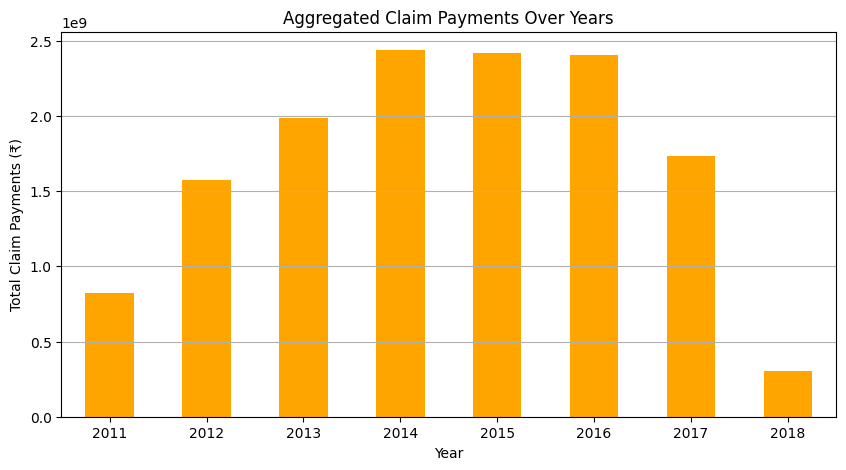

In [44]:
# Group by year and calculate the total insured value (claim payout)
df['Year'] = df['INSR_BEGIN'].dt.year
claim_payments_by_year = df.groupby('Year')['CLAIM_PAID'].sum()
claim_payments_by_year.plot(kind='bar', color='orange', figsize=(10, 5), title="Aggregated Claim Payments Over Years")
plt.xlabel("Year")
plt.ylabel("Total Claim Payments (₹)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

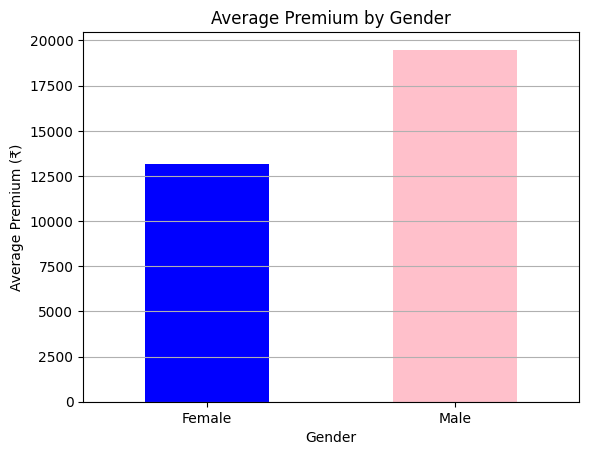

In [45]:
# Map '0' to female and '1' to male
df['SEX'] = df['SEX'].map({0: 'Female', 1: 'Male'})
gender_avg_premium = df.groupby('SEX')['PREMIUM'].mean()
gender_avg_premium.plot(kind='bar', color=['blue', 'pink'], title="Average Premium by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Premium (₹)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

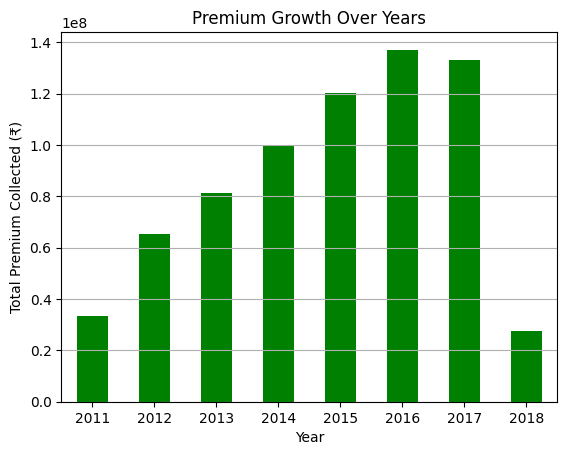

In [49]:
# Premium growth by year
premium_by_year = df.groupby('Year')['PREMIUM'].sum()
premium_by_year.plot(kind='bar', color='green', title="Premium Growth Over Years")
plt.xlabel("Year")
plt.ylabel("Total Premium Collected (₹)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44614 entries, 6 to 293524
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   SEX                     41592 non-null  object        
 1   INSR_BEGIN              44614 non-null  datetime64[ns]
 2   INSR_END                44614 non-null  datetime64[ns]
 3   EFFECTIVE_YR            44614 non-null  object        
 4   INSR_TYPE               44614 non-null  int64         
 5   INSURED_VALUE           44614 non-null  float64       
 6   PREMIUM                 44614 non-null  float64       
 7   OBJECT_ID               44614 non-null  int64         
 8   PROD_YEAR               44614 non-null  float64       
 9   SEATS_NUM               44614 non-null  float64       
 10  CARRYING_CAPACITY       44614 non-null  float64       
 11  TYPE_VEHICLE            44614 non-null  object        
 12  CCM_TON                 44614 non-null  float64   

In [60]:
# Download CSV File
df.to_csv('insurance.csv')